# 鄰近質心演算法分類(Nearest Centroid Classifier)

##### 先引入我們需要的packages

In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
from numpy import random

# Training Data

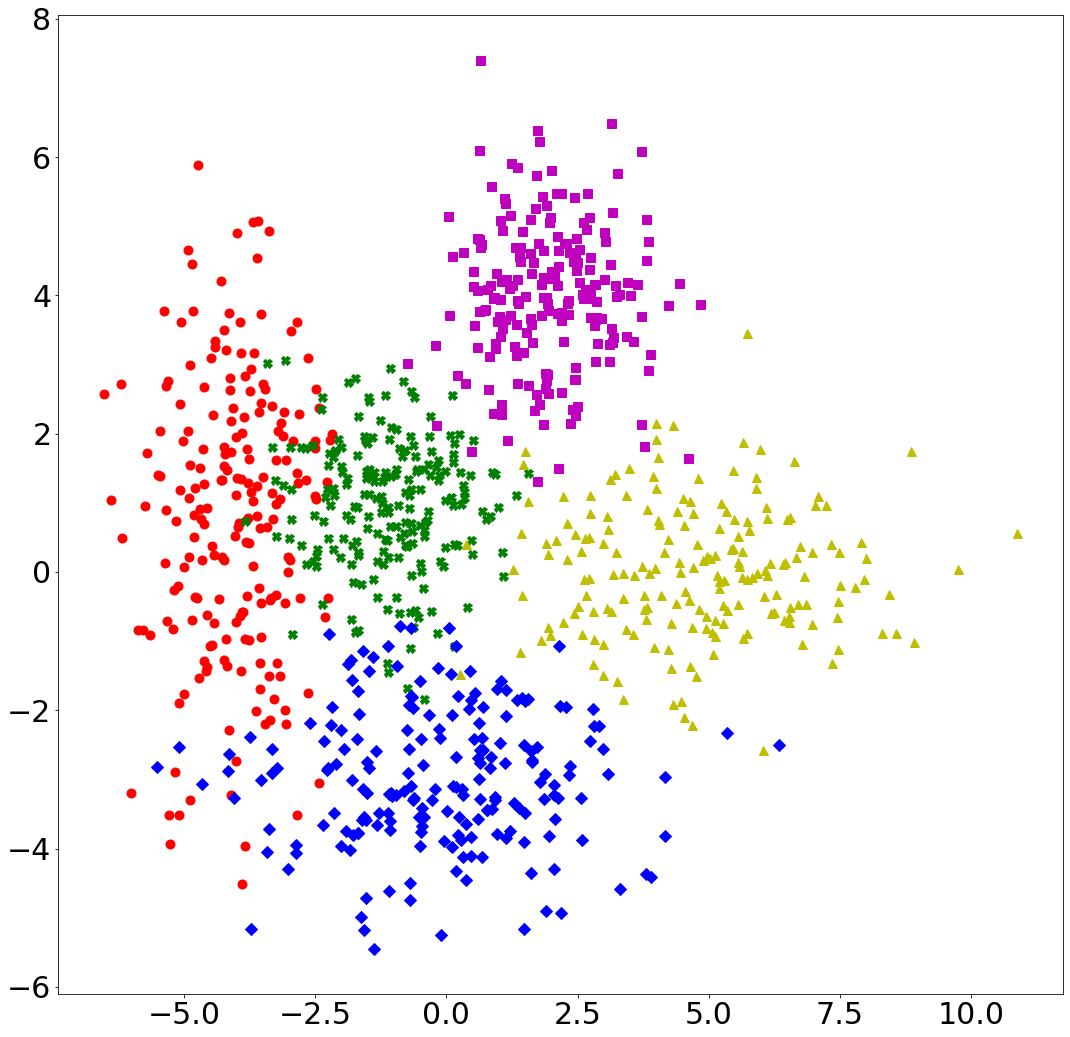

In [2]:
N=1000
CLASS=5
x=np.zeros((N,2))
y=random.randint(0,CLASS,N)
x_loc=[-4,-1,0,5,2]
x_scale=[1,1,2,2,1]
y_loc=[1,1,-3,0,4]
y_scale=[2,1,1,1,1]
color=["ro","gX","bD","y^","ms"]
plt.rcParams["figure.figsize"] = (18,18)
for i in range(0,CLASS):
    BOOL=(y==i)
    x[BOOL,0]=random.normal(loc=x_loc[i], scale=x_scale[i], size=(sum(BOOL)))
    x[BOOL,1]=random.normal(loc=y_loc[i], scale=y_scale[i], size=(sum(BOOL)))
    plt.plot(x[BOOL,0],x[BOOL,1],color[i],markersize=9)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

# Standardization

In [3]:
mean=np.zeros((CLASS,2))
dist_sum=np.zeros((CLASS,2))
std=np.zeros(2)
for i in range(0,CLASS):
    mean[i,0],mean[i,1]=np.mean(x[(y==i),0]),np.mean(x[(y==i),1])
    dist_sum[i,0],dist_sum[i,1]=sum((x[(y==i),0]-mean[i,0])**2),sum((x[(y==i),0]-mean[i,0])**2)
std[0],std[1]=(sum(dist_sum[:,0])/(len(y)-CLASS))**0.5,(sum(dist_sum[:,0])/(len(y)-CLASS))**0.5
std_0=np.median(std)
score=np.zeros((len(y),CLASS))
for i in range(0,CLASS):
    score[:,i]=((x[:,0]-mean[i,0])**2)/((std_0+std[0])**2)+((x[:,1]-mean[i,1])**2)/((std_0+std[1])**2)
    score[:,i]-=2*np.log10(1/len(y==i))
print("The Nearest Centroid Classifier Error Rate =",round(1-sum(np.argmin(score,axis=1)==y)/len(y),3))

The Nearest Centroid Classifier Error Rate = 0.08


# PLOT

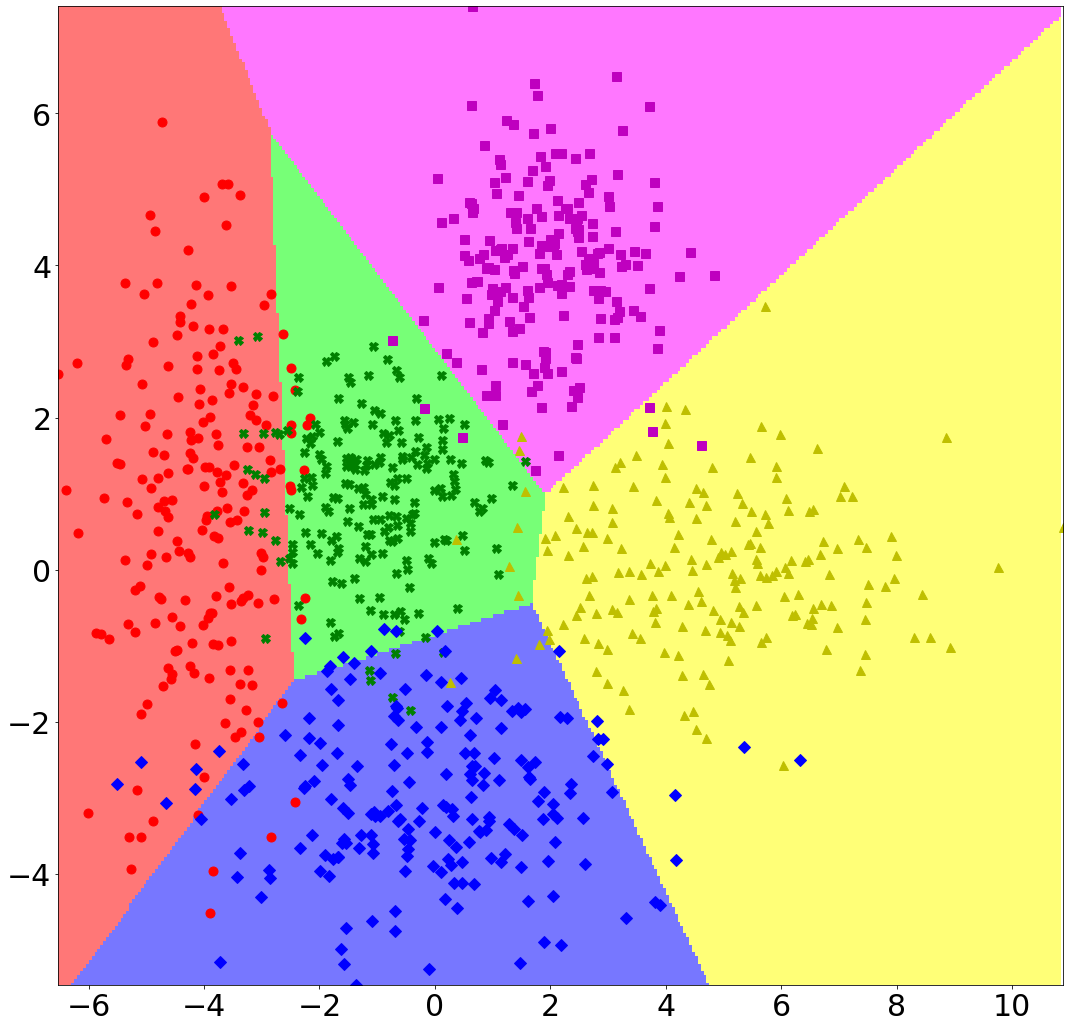

In [4]:
h = 0.05
xx0=np.arange(min(x[:,0]),max(x[:,0]),h)
xx1=np.arange(min(x[:,1]),max(x[:,1]),h)
PLOT_data=np.zeros((len(xx0),len(xx1),2))
PLOT_data[:,:,0],PLOT_data[:,:,1]=np.outer(xx0,np.ones(len(xx1))),np.outer(np.ones(len(xx0)),xx1)
PLOT_score=np.zeros((len(xx0),len(xx1),CLASS))
for i in range(0,CLASS):
    PLOT_score[:,:,i]+=((PLOT_data[:,:,0]-mean[i,0])**2)/((std_0+std[0])**2)
    PLOT_score[:,:,i]+=((PLOT_data[:,:,1]-mean[i,1])**2)/((std_0+std[1])**2)
    PLOT_score[:,:,i]-=2*np.log10(1/len(y==i))
plot_color=["#FF7777","#77FF77","#7777FF","#FFFF77","#FF77FF"]
fig = plt.figure()
ax = fig.add_subplot(111, xlim=(min(x[:,0]),max(x[:,0])), ylim=(min(x[:,1]),max(x[:,1])))
plt.rcParams["figure.figsize"] = (18,18)
for i in range(0,len(xx0)):
    for j in range(0,len(xx1)):
        class_index=np.argmin(PLOT_score[i,j,:])
        polygon = plt.Polygon([[xx0[i]+h/2,xx1[j]+h/2],[xx0[i]+h/2,xx1[j]-h/2],[xx0[i]-h/2,xx1[j]-h/2],
                                   [xx0[i]-h/2,xx1[j]+h/2],[xx0[i]+h/2,xx1[j]+h/2]],
                                  fc=plot_color[class_index],alpha=1)
        ax.add_patch(polygon)
for i in range(0,5):
    BOOL=(y==i)
    plt.plot(x[BOOL,0],x[BOOL,1],color[i],markersize=9)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()